# Tech Challenge FIAP - Etapa 2: Análise Exploratória

In [4]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
import kagglehub
base_dados = kagglehub.dataset_download("awaiskaggler/insurance-csv")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\prado\.cache\kagglehub\datasets\awaiskaggler\insurance-csv\versions\1


# Análise Exploratória de Dados (EDA) - Tech Challenge Fase 1

Esta é a análise exploratória dos dados de custos médicos individuais para desenvolvimento de um modelo preditivo de regressão.

## Objetivo
Desenvolver um modelo para prever custos médicos individuais baseado em características demográficas e de saúde.

**Variáveis do dataset:**
- age: idade
- sex: sexo (male/female)
- bmi: índice de massa corporal
- children: número de filhos
- smoker: fumante (yes/no)
- region: região (southwest, southeast, northwest, northeast)
- expenses: custos médicos <-- (variável target)

In [25]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats

# Configurações de visualização
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

import warnings
warnings.filterwarnings('ignore')

In [26]:
# 1. CARREGAR A BASE DE DADOS
print("=== CARREGAMENTO DOS DADOS ===")
files = os.listdir(base_dados)

# Carregar o dataset
csv_file = files[0]
file_path = os.path.join(base_dados, csv_file)
df = pd.read_csv(file_path)

print(f"\nDataset carregado: {csv_file}")
print(f"Formato do dataset: {df.shape}")

=== CARREGAMENTO DOS DADOS ===

Dataset carregado: insurance.csv
Formato do dataset: (1338, 7)


In [27]:
# 2. EXPLORAÇÃO INICIAL DOS DADOS
print("=== EXPLORAÇÃO INICIAL ===")

# Primeiras e últimas linhas
print("\n--- Primeiras 5 linhas ---")
display(df.head())
print("\n--- Últimas 5 linhas ---")
display(df.tail())

# Informações gerais
print("\n--- Informações gerais do DataFrame ---")
print(f"Dimensões: {df.shape}")
print(f"Colunas: {list(df.columns)}")
df.info()

=== EXPLORAÇÃO INICIAL ===

--- Primeiras 5 linhas ---


,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86



--- Últimas 5 linhas ---


,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36



--- Informações gerais do DataFrame ---
Dimensões: (1338, 7)
Colunas: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [28]:
# Verificar valores ausentes
print("\n--- Análise de Valores Ausentes ---")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Valores Ausentes': missing_data,
    'Percentual (%)': missing_percent
})

print(missing_df)

# Verificar duplicatas
duplicates = df.duplicated().sum()
print(f"\nLinhas duplicadas: {duplicates}")


--- Análise de Valores Ausentes ---
          Valores Ausentes  Percentual (%)
age                      0             0.0
sex                      0             0.0
bmi                      0             0.0
children                 0             0.0
smoker                   0             0.0
region                   0             0.0
expenses                 0             0.0

Linhas duplicadas: 1


In [11]:
# 3. ESTATÍSTICAS DESCRITIVAS

print("=== ESTATÍSTICAS DESCRITIVAS ===")

# Separar variáveis numéricas e categóricas
numeric_vars = ['age', 'bmi', 'children', 'expenses']
categorical_vars = ['sex', 'smoker', 'region']

print("\n--- Variáveis Numéricas ---")
desc_stats = df[numeric_vars].describe()
display(desc_stats)

# Estatísticas adicionais para variáveis numéricas
print("\n--- Estatísticas Adicionais (Numéricas) ---")
additional_stats = pd.DataFrame({
    'Mediana': df[numeric_vars].median(),
    'Moda': df[numeric_vars].mode().iloc[0],
    'Assimetria': df[numeric_vars].skew(),
    'Curtose': df[numeric_vars].kurtosis()
})
display(additional_stats)

=== ESTATÍSTICAS DESCRITIVAS ===

--- Variáveis Numéricas ---


,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000



--- Estatísticas Adicionais (Numéricas) ---


,Mediana,Moda,Assimetria,Curtose
age,39.00,18.00,0.055673,-1.245088
bmi,30.40,27.60,0.284593,-0.053370
children,1.00,0.00,0.938380,0.202454
expenses,9382.03,1639.56,1.515880,1.606299


In [12]:
print("\n--- Variáveis Categóricas ---")
for var in categorical_vars:
    print(f"\n{var.upper()}:")
    counts = df[var].value_counts()
    percentages = df[var].value_counts(normalize=True) * 100
    
    cat_summary = pd.DataFrame({
        'Contagem': counts,
        'Percentual (%)': percentages.round(2)
    })
    display(cat_summary)


--- Variáveis Categóricas ---

SEX:


,Contagem,Percentual (%)
sex,,
male,676,50.52
female,662,49.48



SMOKER:


,Contagem,Percentual (%)
smoker,,
no,1064,79.52
yes,274,20.48



REGION:


,Contagem,Percentual (%)
region,,
southeast,364,27.20
southwest,325,24.29
northwest,325,24.29
northeast,324,24.22


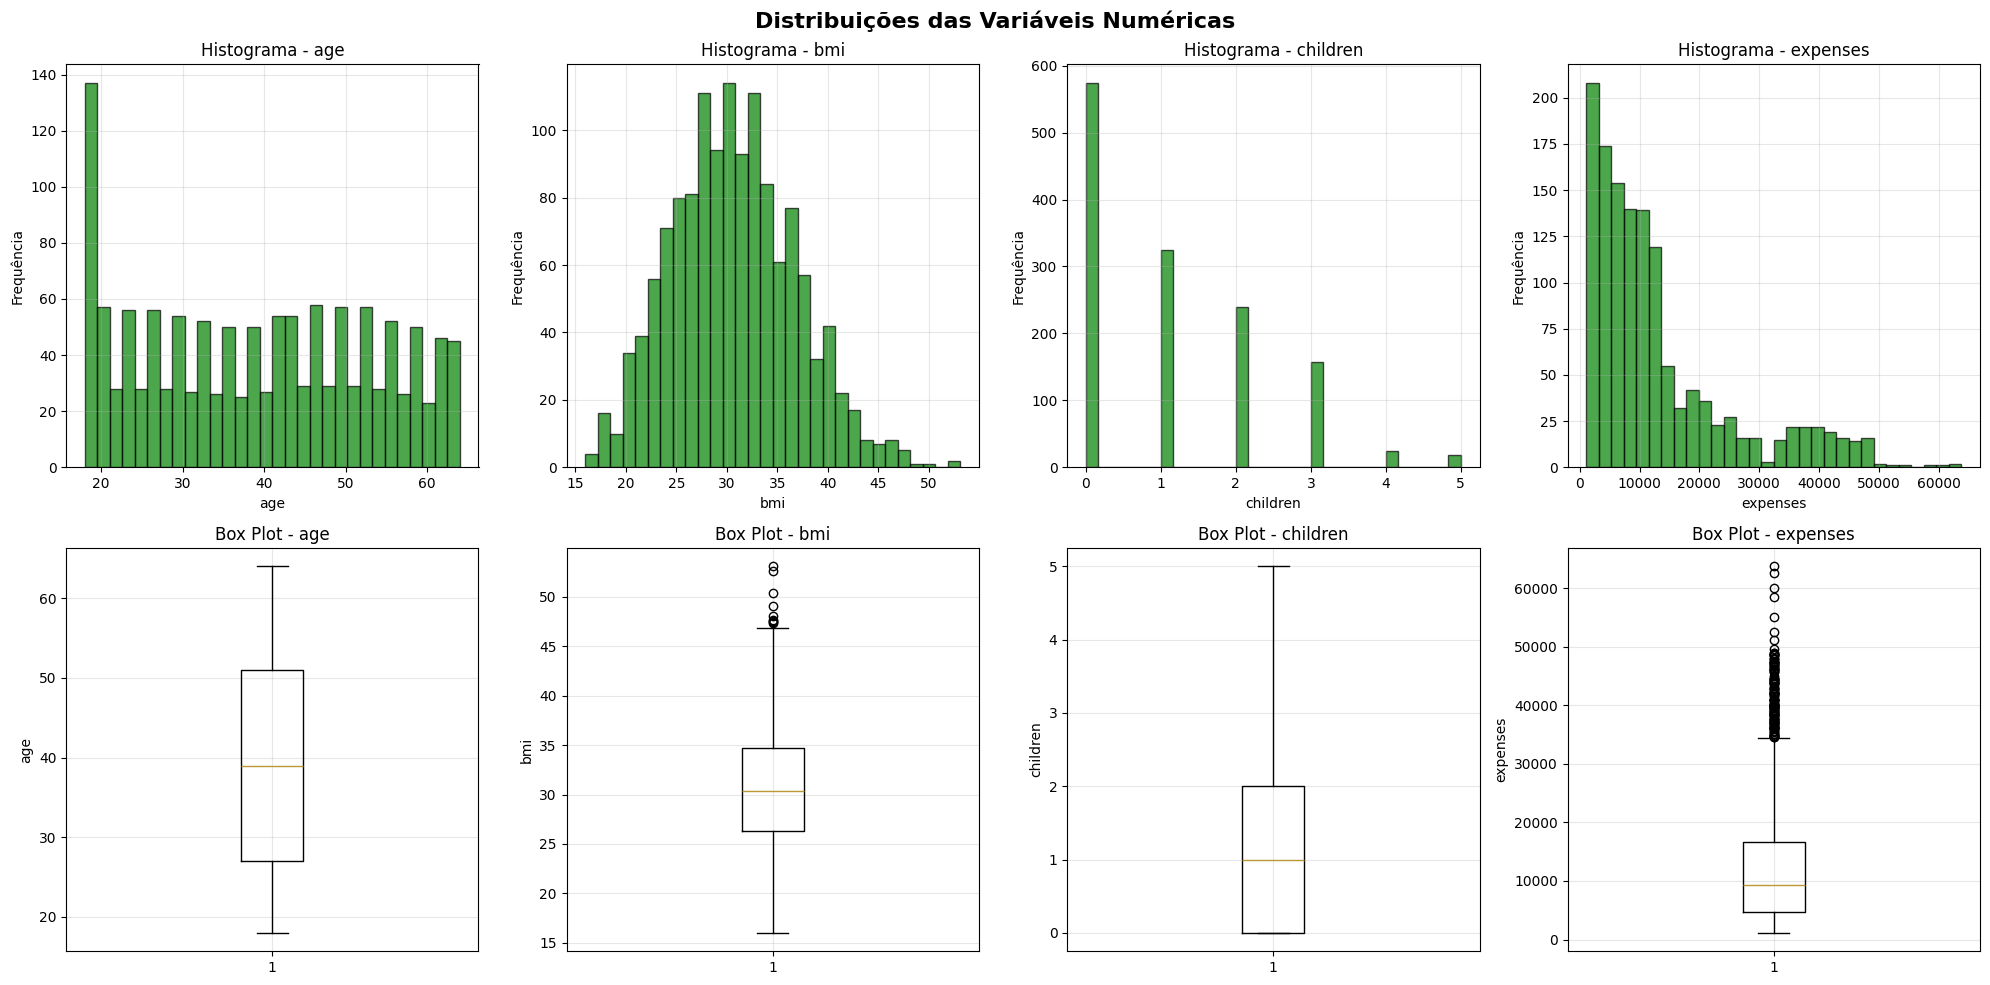

In [29]:
# 4. VISUALIZAÇÕES - DISTRIBUIÇÕES DAS VARIÁVEIS NUMÉRICAS

# Histogramas e Box Plots para variáveis numéricas
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Distribuições das Variáveis Numéricas', fontsize=16, fontweight='bold')

for i, var in enumerate(numeric_vars):
    # Histograma
    axes[0, i].hist(df[var], bins=30, alpha=0.7, color='green', edgecolor='black')
    axes[0, i].set_title(f'Histograma - {var}')
    axes[0, i].set_xlabel(var)
    axes[0, i].set_ylabel('Frequência')
    axes[0, i].grid(True, alpha=0.3)
    
    # Box Plot
    axes[1, i].boxplot(df[var])
    axes[1, i].set_title(f'Box Plot - {var}')
    axes[1, i].set_ylabel(var)
    axes[1, i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

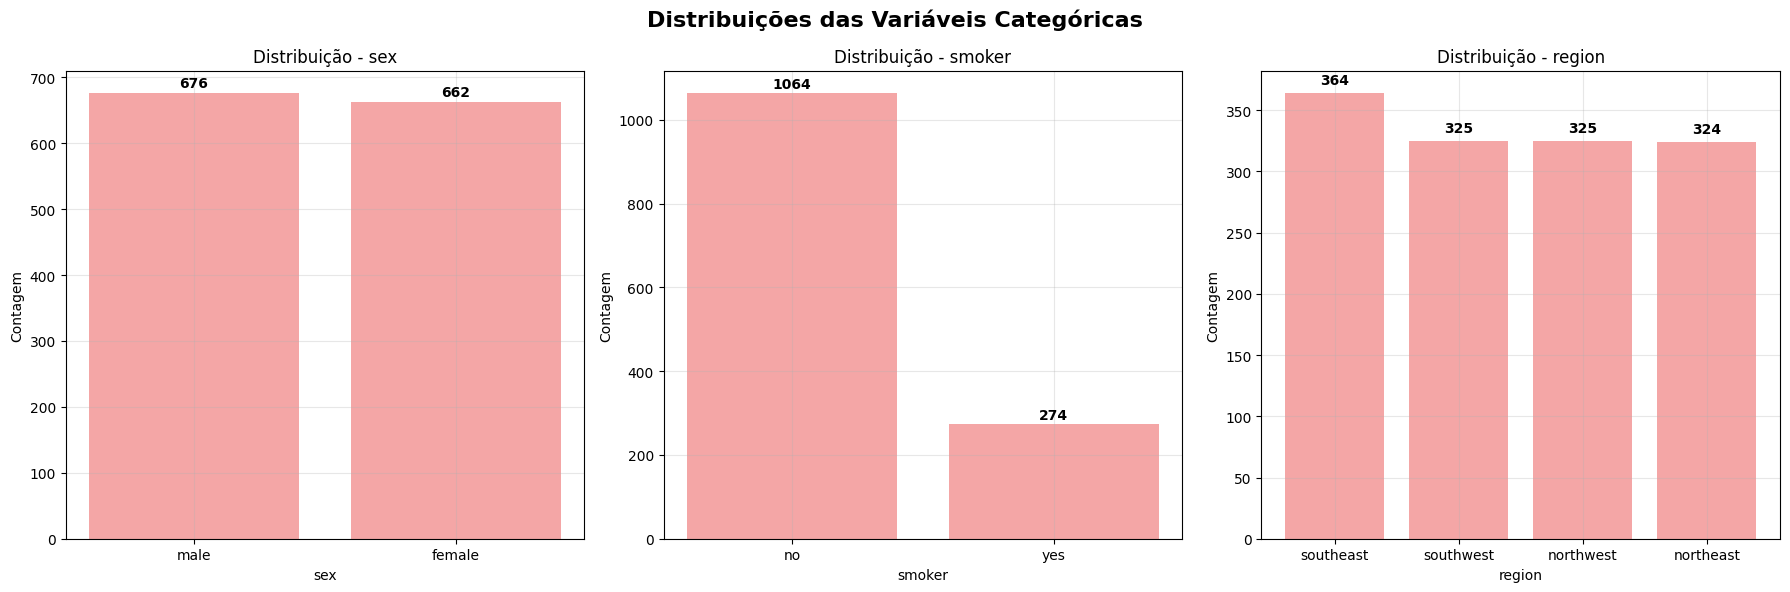

In [14]:
# Gráficos de barras para variáveis categóricas
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Distribuições das Variáveis Categóricas', fontsize=16, fontweight='bold')

for i, var in enumerate(categorical_vars):
    counts = df[var].value_counts()
    axes[i].bar(counts.index, counts.values, alpha=0.7, color='lightcoral')
    axes[i].set_title(f'Distribuição - {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Contagem')
    axes[i].grid(True, alpha=0.3)
    
    # Adicionar valores nas barras
    for j, v in enumerate(counts.values):
        axes[i].text(j, v + 5, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


=== RELAÇÕES ENTRE VARIÁVEIS ===


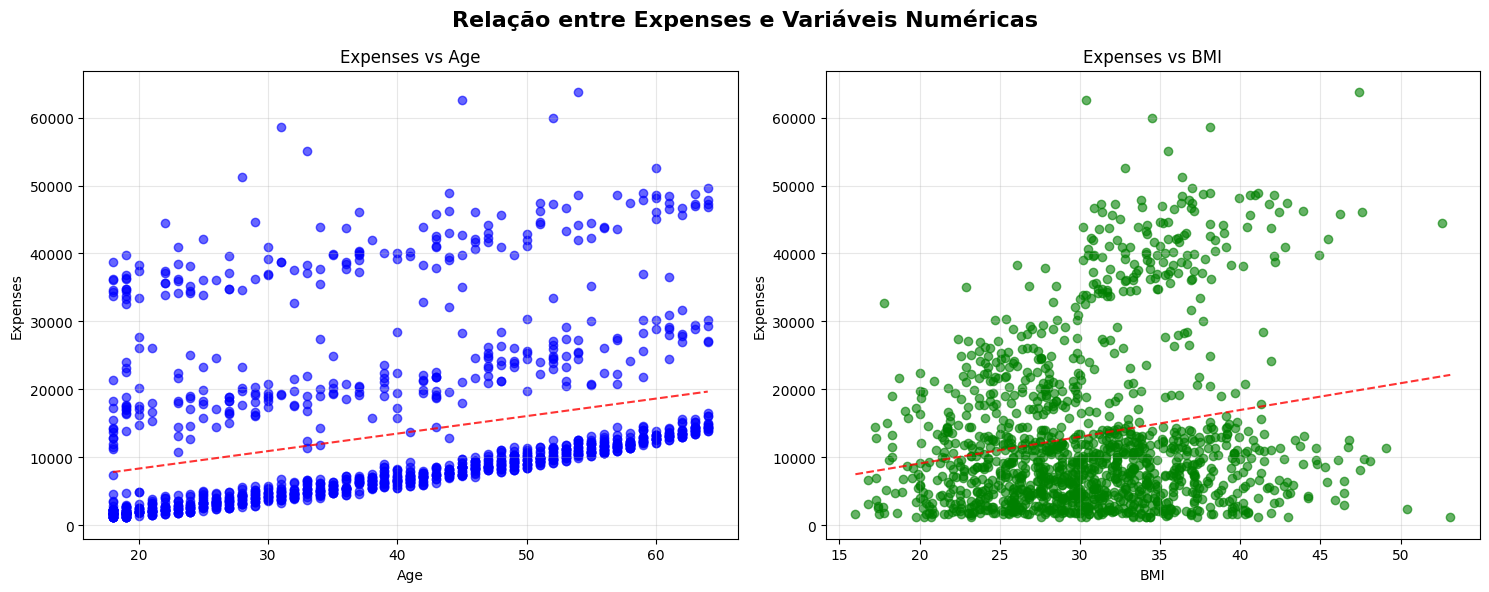

In [ ]:
# 5. ANÁLISE DE RELAÇÕES ENTRE VARIÁVEIS

print("\n=== RELAÇÕES ENTRE VARIÁVEIS ===")

# Scatter plots: expenses vs age e expenses vs bmi
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Relação entre Expenses e Variáveis Numéricas', fontsize=16, fontweight='bold')

# Expenses vs Age
axes[0].scatter(df['age'], df['expenses'], alpha=0.6, color='blue')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Expenses')
axes[0].set_title('Expenses vs Age')
axes[0].grid(True, alpha=0.3)

# Linha de tendência
z = np.polyfit(df['age'], df['expenses'], 1)
p = np.poly1d(z)
axes[0].plot(df['age'].sort_values(), p(df['age'].sort_values()), "r--", alpha=0.8)

# Expenses vs BMI
axes[1].scatter(df['bmi'], df['expenses'], alpha=0.6, color='green')
axes[1].set_xlabel('BMI')
axes[1].set_ylabel('Expenses')
axes[1].set_title('Expenses vs BMI')
axes[1].grid(True, alpha=0.3)

# Linha de tendência
z = np.polyfit(df['bmi'], df['expenses'], 1)
p = np.poly1d(z)
axes[1].plot(df['bmi'].sort_values(), p(df['bmi'].sort_values()), "r--", alpha=0.8)

plt.tight_layout()
plt.show()

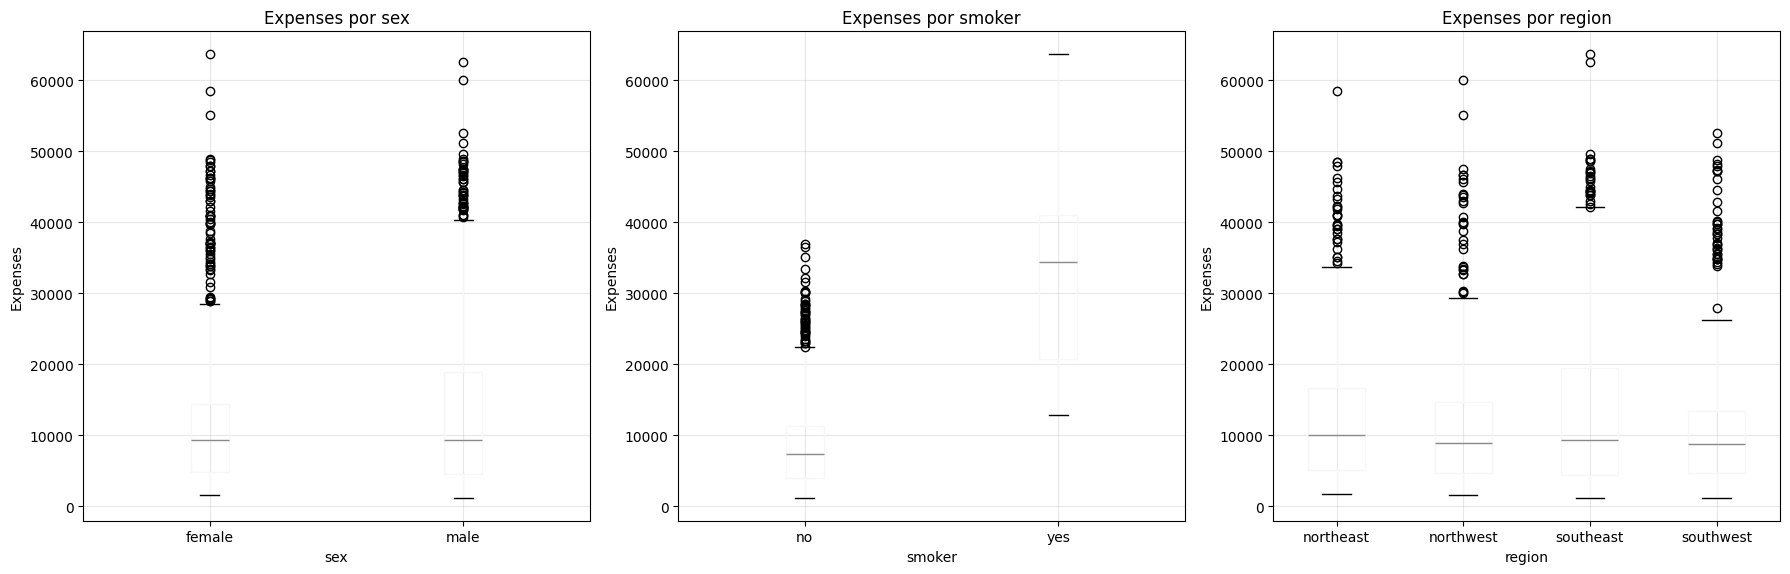

In [ ]:
# Box plots: expenses por variáveis categóricas
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Distribuição de Expenses por Variáveis Categóricas', fontsize=16, fontweight='bold')

for i, var in enumerate(categorical_vars):
    df.boxplot(column='expenses', by=var, ax=axes[i])
    axes[i].set_title(f'Expenses por {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Expenses')
    axes[i].grid(True, alpha=0.3)

plt.suptitle('')
plt.tight_layout()
plt.show()


--- Matriz de Correlação ---
            age    bmi  children  expenses
age       1.000  0.109     0.042     0.299
bmi       0.109  1.000     0.013     0.199
children  0.042  0.013     1.000     0.068
expenses  0.299  0.199     0.068     1.000


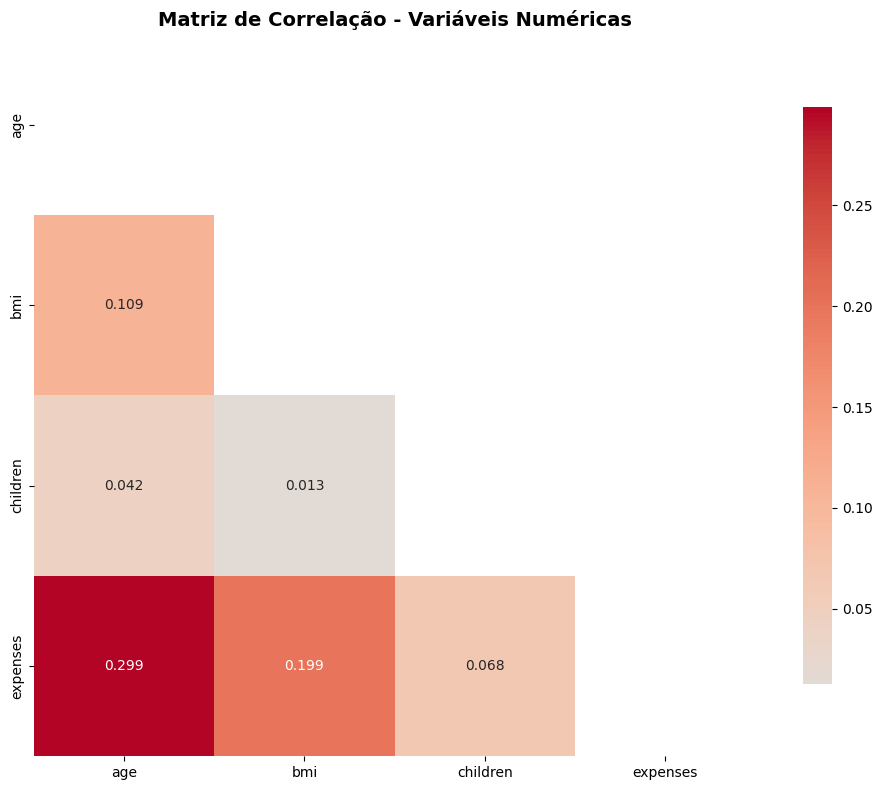

In [ ]:
# Matriz de correlação
print("\n--- Matriz de Correlação ---")

correlation_matrix = df[numeric_vars].corr()
print(correlation_matrix.round(3))

plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='coolwarm', 
            center=0,
            square=True,
            fmt='.3f',
            cbar_kws={'shrink': 0.8})
plt.title('Matriz de Correlação - Variáveis Numéricas', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
# 6. ANÁLISES COMPLEMENTARES

# Teste de normalidade para variáveis numéricas
print("\n--- Teste de Normalidade (Shapiro-Wilk) ---")
print("H0: A distribuição é normal")
print("H1: A distribuição não é normal")
print("Nível de significância: 0.05\n")

for var in numeric_vars:
    if len(df[var]) <= 5000:
        stat, p_value = stats.shapiro(df[var])
        result = "Normal" if p_value > 0.05 else "Não Normal"
        print(f"{var}: p-value = {p_value:.4f} → {result}")
    else:
        print(f"{var}: Amostra muito grande para Shapiro-Wilk")

# Análise de outliers usando IQR
print("\n--- Análise de Outliers (Método IQR) ---")
for var in numeric_vars:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[var] < lower_bound) | (df[var] > upper_bound)]
    outlier_count = len(outliers)
    outlier_percent = (outlier_count / len(df)) * 100
    
    print(f"{var}: {outlier_count} outliers ({outlier_percent:.2f}%)")


=== ANÁLISES ESTATÍSTICAS COMPLEMENTARES ===

--- Teste de Normalidade (Shapiro-Wilk) ---
H0: A distribuição é normal
H1: A distribuição não é normal
Nível de significância: 0.05

age: p-value = 0.0000 → Não Normal
bmi: p-value = 0.0000 → Não Normal
children: p-value = 0.0000 → Não Normal
expenses: p-value = 0.0000 → Não Normal

--- Análise de Outliers (Método IQR) ---
age: 0 outliers (0.00%)
bmi: 9 outliers (0.67%)
children: 0 outliers (0.00%)
expenses: 139 outliers (10.39%)
